In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train_file = './dataset/train.csv'
test_file = './dataset/test.csv'

In [3]:
traindf = pd.read_csv(train_file)
traindf.head()

,Image,target
0,96.jpg,manipuri
1,163.jpg,bharatanatyam
2,450.jpg,odissi
3,219.jpg,kathakali
4,455.jpg,odissi


In [4]:
traindf['Image'] = traindf['Image'].apply(lambda x : x[:x.find('.')])
traindf.head()

,Image,target
0,96,manipuri
1,163,bharatanatyam
2,450,odissi
3,219,kathakali
4,455,odissi


In [5]:
traindf = traindf.sort_values('Image')
traindf.head()

,Image,target
254,1,kathak
356,10,kathak
183,100,manipuri
342,101,manipuri
47,102,manipuri


In [6]:
traindf = traindf.reset_index(drop=True)
traindf.head()

,Image,target
0,1,kathak
1,10,kathak
2,100,manipuri
3,101,manipuri
4,102,manipuri


In [7]:
import os
import cv2

def image_loader(folderPath, dataset):
    
    images = []
    
    for i, filename in enumerate(os.listdir(folderPath)):
        
        assert filename == dataset.Image[i] + '.jpg'
        
        img = cv2.imread(os.path.join(folderPath, filename))
        
        if img is not None:
            images.append(img)
            
    return images

In [8]:
testdf = pd.read_csv(test_file)
testdf['Image'] = testdf['Image'].apply(lambda x : x[:x.find('.')])
testdf = testdf.sort_values('Image').reset_index(drop=True)
testdf.head()

,Image
0,108
1,11
2,110
3,112
4,114


In [9]:
trainFolder = './dataset/train/'
testFolder = './dataset/test/'

In [10]:
trainImages = image_loader(folderPath=trainFolder, dataset=traindf)
testImages = image_loader(folderPath=testFolder, dataset=testdf)

In [11]:
# Display two images
def display(a, b, title1 = "Original", title2 = "Edited"):
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()

# Display one image
def display_one(a, title1 = "Original"):
    plt.imshow(a), plt.title(title1)
    plt.show()

In [12]:
def preprocessing(imageset):
    # read 3 images to work
    resultant_images = []
    for i in range(len(imageset)):
        
        img = imageset[i]
    
        try:
            print('Original size : ', img.shape)
        except AttributeError:
            print('Shape not found.')
        
        # set up the target shape
        width = 440
        height = 440
        dim = (width, height)
        resultantImage = cv2.resize(img, dim, interpolation=cv2.INTER_LINEAR)
    
        # sanity check
        try:
            print('Resized shape: ', resultantImage.shape)
        except AttributeError:
            print('Not preprocessed')
        # normalize the resultant image
        #resultantImage /= 255.0
        # visualize both
        #display(img, resultantImage)
        
        resultant_images.append(resultantImage)
    
    return resultant_images

In [13]:
processedTrainImages = preprocessing(trainImages)
processedTestImages = preprocessing(testImages)

Original size :  (596, 1061, 3)
Resized shape:  (440, 440, 3)
Original size :  (183, 275, 3)
Resized shape:  (440, 440, 3)
Original size :  (157, 250, 3)
Resized shape:  (440, 440, 3)
Original size :  (237, 250, 3)
Resized shape:  (440, 440, 3)
Original size :  (232, 217, 3)
Resized shape:  (440, 440, 3)
Original size :  (219, 231, 3)
Resized shape:  (440, 440, 3)
Original size :  (1169, 826, 3)
Resized shape:  (440, 440, 3)
Original size :  (187, 269, 3)
Resized shape:  (440, 440, 3)
Original size :  (187, 270, 3)
Resized shape:  (440, 440, 3)
Original size :  (177, 284, 3)
Resized shape:  (440, 440, 3)
Original size :  (168, 300, 3)
Resized shape:  (440, 440, 3)
Original size :  (284, 450, 3)
Resized shape:  (440, 440, 3)
Original size :  (183, 275, 3)
Resized shape:  (440, 440, 3)
Original size :  (168, 300, 3)
Resized shape:  (440, 440, 3)
Original size :  (259, 194, 3)
Resized shape:  (440, 440, 3)
Original size :  (273, 184, 3)
Resized shape:  (440, 440, 3)
Original size :  (184,

Resized shape:  (440, 440, 3)
Original size :  (2700, 1800, 3)
Resized shape:  (440, 440, 3)
Original size :  (259, 195, 3)
Resized shape:  (440, 440, 3)
Original size :  (260, 193, 3)
Resized shape:  (440, 440, 3)
Original size :  (500, 397, 3)
Resized shape:  (440, 440, 3)
Original size :  (256, 197, 3)
Resized shape:  (440, 440, 3)
Original size :  (948, 636, 3)
Resized shape:  (440, 440, 3)
Original size :  (360, 480, 3)
Resized shape:  (440, 440, 3)
Original size :  (900, 599, 3)
Resized shape:  (440, 440, 3)
Original size :  (270, 187, 3)
Resized shape:  (440, 440, 3)
Original size :  (194, 259, 3)
Resized shape:  (440, 440, 3)
Original size :  (900, 600, 3)
Resized shape:  (440, 440, 3)
Original size :  (450, 900, 3)
Resized shape:  (440, 440, 3)
Original size :  (276, 183, 3)
Resized shape:  (440, 440, 3)
Original size :  (263, 191, 3)
Resized shape:  (440, 440, 3)
Original size :  (263, 191, 3)
Resized shape:  (440, 440, 3)
Original size :  (512, 341, 3)
Resized shape:  (440, 

Resized shape:  (440, 440, 3)
Original size :  (267, 189, 3)
Resized shape:  (440, 440, 3)
Original size :  (260, 194, 3)
Resized shape:  (440, 440, 3)
Original size :  (167, 301, 3)
Resized shape:  (440, 440, 3)
Original size :  (392, 600, 3)
Resized shape:  (440, 440, 3)
Original size :  (1170, 827, 3)
Resized shape:  (440, 440, 3)
Original size :  (181, 278, 3)
Resized shape:  (440, 440, 3)
Original size :  (194, 260, 3)
Resized shape:  (440, 440, 3)
Original size :  (720, 1280, 3)
Resized shape:  (440, 440, 3)
Original size :  (225, 225, 3)
Resized shape:  (440, 440, 3)
Original size :  (275, 183, 3)
Resized shape:  (440, 440, 3)
Original size :  (165, 220, 3)
Resized shape:  (440, 440, 3)
Original size :  (226, 223, 3)
Resized shape:  (440, 440, 3)
Original size :  (500, 358, 3)
Resized shape:  (440, 440, 3)
Original size :  (235, 214, 3)
Resized shape:  (440, 440, 3)
Original size :  (213, 237, 3)
Resized shape:  (440, 440, 3)
Original size :  (302, 288, 3)
Resized shape:  (440, 

(440, 440, 3)
(440, 440, 3)
(440, 440, 3)
(440, 440, 3)
(440, 440, 3)


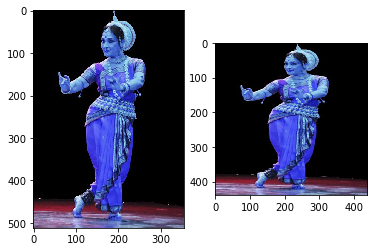

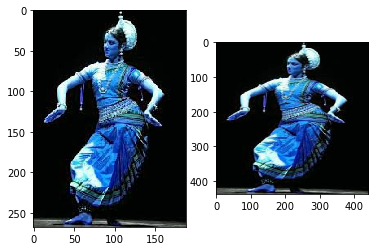

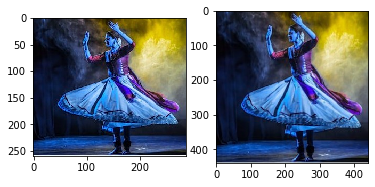

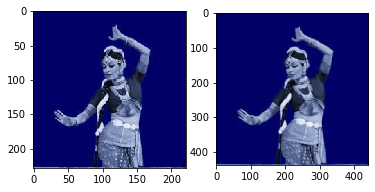

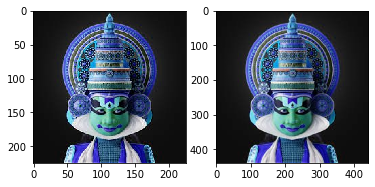

In [15]:
import random
for _ in range(5):
    j = random.randint(10, len(testImages))
    f, (org, pro) = plt.subplots(1, 2)
    print(processedTestImages[j].shape)
    pro.imshow(processedTestImages[j])
    org.imshow(testImages[j])

In [16]:
traindf['PI'] = processedTrainImages
traindf.head()

,Image,target,PI
0,1,kathak,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,10,kathak,"[[[30, 34, 35], [30, 34, 35], [30, 34, 35], [3..."
2,100,manipuri,"[[[16, 16, 16], [16, 16, 16], [16, 16, 16], [1..."
3,101,manipuri,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
4,102,manipuri,"[[[22, 44, 20], [22, 44, 20], [22, 44, 20], [2..."


In [18]:
# label encode target columns
# then apply to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [19]:
le = LabelEncoder()
traindf['labels'] = le.fit_transform(traindf['target'])
traindf.head()

,Image,target,PI,labels
0,1,kathak,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1
1,10,kathak,"[[[30, 34, 35], [30, 34, 35], [30, 34, 35], [3...",1
2,100,manipuri,"[[[16, 16, 16], [16, 16, 16], [16, 16, 16], [1...",4
3,101,manipuri,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",4
4,102,manipuri,"[[[22, 44, 20], [22, 44, 20], [22, 44, 20], [2...",4


In [24]:
labels = tf.keras.utils.to_categorical(traindf['labels'], num_classes=8)

In [25]:
features = np.array(traindf.PI.to_list())
features.shape

(364, 440, 440, 3)

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(features, labels,
                                                test_size=0.15, random_state=42)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(309, 440, 440, 3) (309, 8)
(55, 440, 440, 3) (55, 8)


In [29]:
from keras.layers import Conv2D, BatchNormalization, Dropout, Dense, Flatten
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (440, 440, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size = 4, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(8, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 438, 438, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 438, 438, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 436, 436, 32)      9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 436, 436, 32)      128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 218, 218, 32)      25632     
_________________________________________________________________
batch_normalization_3 (Batch (None, 218, 218, 32)      128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 218, 218, 32)     

In [30]:
H = model.fit(X_train, y_train,
             batch_size=1, epochs=25,
             validation_data=(X_val, y_val))

Train on 309 samples, validate on 55 samples
Epoch 1/25
309/309 [==============================] - 120s 388ms/step - loss: 340.1284 - accuracy: 0.1780 - val_loss: 1641.6279 - val_accuracy: 0.1091
Epoch 2/25
309/309 [==============================] - 122s 394ms/step - loss: 276.1402 - accuracy: 0.3560 - val_loss: 927.9932 - val_accuracy: 0.1818
Epoch 3/25
309/309 [==============================] - 104s 335ms/step - loss: 92.5191 - accuracy: 0.7120 - val_loss: 529.7734 - val_accuracy: 0.2364
Epoch 4/25
309/309 [==============================] - 99s 319ms/step - loss: 46.3170 - accuracy: 0.8188 - val_loss: 512.1551 - val_accuracy: 0.2545
Epoch 5/25
309/309 [==============================] - 99s 320ms/step - loss: 26.7116 - accuracy: 0.8900 - val_loss: 666.1928 - val_accuracy: 0.3091
Epoch 6/25
309/309 [==============================] - 99s 321ms/step - loss: 15.8851 - accuracy: 0.9353 - val_loss: 860.4368 - val_accuracy: 0.2545
Epoch 7/25
309/309 [==============================] - 99s 320

In [33]:
prediction_labels = model.predict_classes(np.array(processedTestImages), batch_size=1)
prediction_labels

array([4, 1, 4, 1, 7, 3, 7, 5, 4, 5, 1, 6, 1, 1, 3, 6, 3, 0, 3, 6, 7, 4,
       2, 0, 1, 5, 5, 1, 2, 1, 1, 4, 5, 5, 5, 5, 5, 5, 1, 4, 7, 3, 1, 2,
       5, 6, 1, 1, 3, 4, 6, 5, 1, 1, 1, 6, 4, 6, 2, 5, 5, 5, 7, 4, 1, 2,
       5, 1, 6, 7, 6, 1, 7, 5, 1, 6, 1, 2, 1, 7, 7, 1, 5, 7, 1, 6, 4, 1,
       4, 2, 1, 0, 6, 0, 1, 7, 3, 3, 2, 1, 3, 5, 1, 3, 1, 6, 3, 7, 3, 3,
       1, 1, 6, 4, 1, 2, 3, 0, 6, 6, 6, 4, 7, 6, 1, 6, 5, 6, 6, 6, 6, 6,
       5, 1, 2, 6, 5, 5, 3, 7, 5, 1, 1, 1, 6, 4, 1, 1, 1, 1, 4, 4, 3, 5,
       4, 3], dtype=int64)

In [34]:
final_predictions = le.inverse_transform(prediction_labels)
final_predictions

array(['manipuri', 'kathak', 'manipuri', 'kathak', 'sattriya',
       'kuchipudi', 'sattriya', 'mohiniyattam', 'manipuri',
       'mohiniyattam', 'kathak', 'odissi', 'kathak', 'kathak',
       'kuchipudi', 'odissi', 'kuchipudi', 'bharatanatyam', 'kuchipudi',
       'odissi', 'sattriya', 'manipuri', 'kathakali', 'bharatanatyam',
       'kathak', 'mohiniyattam', 'mohiniyattam', 'kathak', 'kathakali',
       'kathak', 'kathak', 'manipuri', 'mohiniyattam', 'mohiniyattam',
       'mohiniyattam', 'mohiniyattam', 'mohiniyattam', 'mohiniyattam',
       'kathak', 'manipuri', 'sattriya', 'kuchipudi', 'kathak',
       'kathakali', 'mohiniyattam', 'odissi', 'kathak', 'kathak',
       'kuchipudi', 'manipuri', 'odissi', 'mohiniyattam', 'kathak',
       'kathak', 'kathak', 'odissi', 'manipuri', 'odissi', 'kathakali',
       'mohiniyattam', 'mohiniyattam', 'mohiniyattam', 'sattriya',
       'manipuri', 'kathak', 'kathakali', 'mohiniyattam', 'kathak',
       'odissi', 'sattriya', 'odissi', 'kathak', 's

In [35]:
testdf['target'] = final_predictions

In [37]:
testdf.head()

,Image,target
0,108,manipuri
1,11,kathak
2,110,manipuri
3,112,kathak
4,114,sattriya


In [39]:
testdf.to_csv('Submission.csv', index=False)

In [40]:
trial = pd.read_csv('./dataset/test.csv')
trial.head()

,Image
0,508.jpg
1,246.jpg
2,473.jpg
3,485.jpg
4,128.jpg


In [41]:
submit = pd.read_csv('submission.csv')
submit.head()

,Image,target
0,108,manipuri
1,11,kathak
2,110,manipuri
3,112,kathak
4,114,sattriya


In [43]:
submit['Image'] = submit['Image'].apply(lambda x : str(x) + '.jpg')
submit.head()

,Image,target
0,108.jpg,manipuri
1,11.jpg,kathak
2,110.jpg,manipuri
3,112.jpg,kathak
4,114.jpg,sattriya


In [44]:
submit.to_csv('submission.csv', index=False)